In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [76]:
import zipfile

zip_ref = zipfile.ZipFile('/content/archive.zip')
zip_ref.extractall()
zip_ref.close()

In [77]:
!ls Grapevine_Leaves_Image_Dataset

Ak  Ala_Idris  Buzgulu	Dimnit	Grapevine_Leaves_Image_Dataset_Citation_Request.txt  Nazli


In [78]:
import os

for dirpath, dirnames, filenames in os.walk('Grapevine_Leaves_Image_Dataset'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 5 directories and 1 images in Grapevine_Leaves_Image_Dataset.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Ak.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Dimnit.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Ala_Idris.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Buzgulu.
There are 0 directories and 100 images in Grapevine_Leaves_Image_Dataset/Nazli.


In [30]:
for i in os.walk('Grapevine_Leaves_Image_Dataset'):
  print(i)

('Grapevine_Leaves_Image_Dataset', ['Ak', 'Dimnit', 'Ala_Idris', 'Buzgulu', 'Nazli'], ['Grapevine_Leaves_Image_Dataset_Citation_Request.txt'])
('Grapevine_Leaves_Image_Dataset/Ak', [], ['Ak (84).png', 'Ak (56).png', 'Ak (22).png', 'Ak (15).png', 'Ak (20).png', 'Ak (19).png', 'Ak (53).png', 'Ak (27).png', 'Ak (30).png', 'Ak (99).png', 'Ak (83).png', 'Ak (88).png', 'Ak (59).png', 'Ak (9).png', 'Ak (29).png', 'Ak (65).png', 'Ak (24).png', 'Ak (49).png', 'Ak (3).png', 'Ak (79).png', 'Ak (51).png', 'Ak (97).png', 'Ak (14).png', 'Ak (7).png', 'Ak (23).png', 'Ak (5).png', 'Ak (100).png', 'Ak (76).png', 'Ak (2).png', 'Ak (57).png', 'Ak (62).png', 'Ak (85).png', 'Ak (39).png', 'Ak (55).png', 'Ak (25).png', 'Ak (89).png', 'Ak (68).png', 'Ak (61).png', 'Ak (70).png', 'Ak (4).png', 'Ak (71).png', 'Ak (52).png', 'Ak (13).png', 'Ak (43).png', 'Ak (94).png', 'Ak (41).png', 'Ak (21).png', 'Ak (10).png', 'Ak (34).png', 'Ak (58).png', 'Ak (96).png', 'Ak (98).png', 'Ak (86).png', 'Ak (66).png', 'Ak (42).

In [79]:
num_rice_directories = len(os.listdir('/content/Grapevine_Leaves_Image_Dataset'))
num_rice_directories

6

In [80]:
import pathlib
data_dir = pathlib.Path('/content/Grapevine_Leaves_Image_Dataset')
data_dir

PosixPath('/content/Grapevine_Leaves_Image_Dataset')

In [81]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Ak' 'Ala_Idris' 'Buzgulu' 'Dimnit'
 'Grapevine_Leaves_Image_Dataset_Citation_Request.txt' 'Nazli']


In [82]:
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir + target_class
  random_img = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (511, 511, 4)


array([[[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       ...,

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.]],

       [[1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        ...,
        [1., 1., 1., 0.],
        [1., 1.

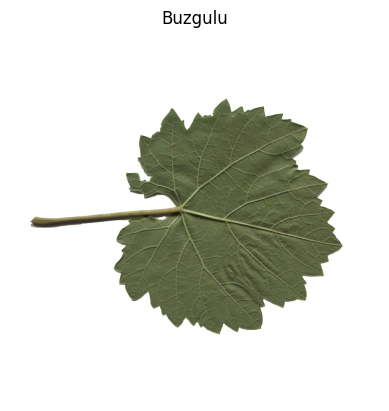

In [83]:
img = view_random_image(target_dir='/content/Grapevine_Leaves_Image_Dataset/',target_class='Buzgulu')
img

In [84]:
img/255

array([[[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ]],

       [[0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157, 0.        ],
        [0.00392157, 0.003921

# Fit the model

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
valid_datagen = ImageDataGenerator(rescale=1./255)

dir = '/content/Grapevine_Leaves_Image_Dataset'

In [88]:
train_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='training',
                                               seed=42)

valid_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='validation',
                                               seed=42)

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [89]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [91]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 341ms/step - accuracy: 0.2042 - loss: 1.6220 - val_accuracy: 0.2400 - val_loss: 1.5943
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 299ms/step - accuracy: 0.3505 - loss: 1.5432 - val_accuracy: 0.2700 - val_loss: 1.5810
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.4644 - loss: 1.3495 - val_accuracy: 0.3100 - val_loss: 1.6094
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.6123 - loss: 1.0674 - val_accuracy: 0.3600 - val_loss: 1.7985
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.7147 - loss: 0.6881 - val_accuracy: 0.3700 - val_loss: 1.6992


In [92]:
model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │         140,455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 430,397 (1.64 MB)

 Trainable params: 143,465 (560.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 286,932 (1.09 MB)

In [93]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_2.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [94]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 285ms/step - accuracy: 0.2200 - loss: 78.4618 - val_accuracy: 0.2000 - val_loss: 31.1118
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.1892 - loss: 28.5353 - val_accuracy: 0.2000 - val_loss: 14.3024
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.1865 - loss: 12.5233 - val_accuracy: 0.2000 - val_loss: 12.3992
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - accuracy: 0.2183 - loss: 10.7297 - val_accuracy: 0.2000 - val_loss: 8.4145
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.1993 - loss: 8.0108 - val_accuracy: 0.2600 - val_loss: 3.2028


In [95]:
len(train_data)

13

Image shape: (511, 511, 4)
Image shape: (511, 511, 4)
Image shape: (511, 511, 4)
Image shape: (511, 511, 4)


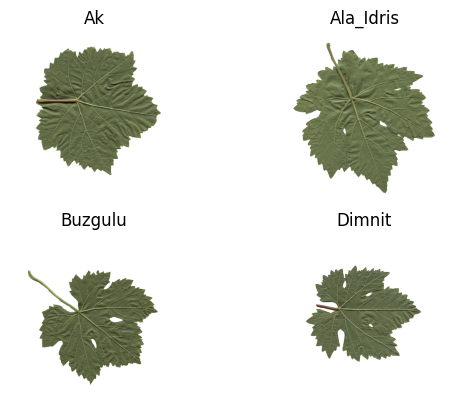

In [96]:
plt.figure()
plt.subplot(2,2,1)
view_random_image('Grapevine_Leaves_Image_Dataset/','Ak');
plt.subplot(2,2,2)
view_random_image('Grapevine_Leaves_Image_Dataset/','Ala_Idris');
plt.subplot(2,2,3)
view_random_image('Grapevine_Leaves_Image_Dataset/','Buzgulu');
plt.subplot(2,2,4)
view_random_image('Grapevine_Leaves_Image_Dataset/','Dimnit');

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
valid_datagen = ImageDataGenerator(rescale=1./255)

dir = '/content/Grapevine_Leaves_Image_Dataset'

train_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='training',
                                               seed=42)

test_data = train_datagen.flow_from_directory(directory=dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42)

Found 400 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [98]:
images, labels = next(train_data)

In [99]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPool2D
from tensorflow.keras import Sequential

In [100]:
tf.keras.backend.clear_session()

In [101]:
model_3 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Conv2D(filters=10,
           kernel_size=3,
           strides=2,
           activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(5, activation='softmax')
])

In [102]:
optimizer=Adam(learning_rate=1e-3)
model_3.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

In [103]:
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 348ms/step - accuracy: 0.1694 - loss: 1.6256 - val_accuracy: 0.1800 - val_loss: 1.6131
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - accuracy: 0.1863 - loss: 1.6127 - val_accuracy: 0.1900 - val_loss: 1.6114
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - accuracy: 0.2021 - loss: 1.6088 - val_accuracy: 0.2000 - val_loss: 1.6106
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 201ms/step - accuracy: 0.1972 - loss: 1.6090 - val_accuracy: 0.1900 - val_loss: 1.6088
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.2605 - loss: 1.6043 - val_accuracy: 0.2000 - val_loss: 1.6088


In [104]:
model_2.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.2750 - loss: 2.9441


[2.9430043697357178, 0.27399998903274536]

In [105]:
model_3.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.2706 - loss: 1.6032


[1.603478193283081, 0.2800000011920929]

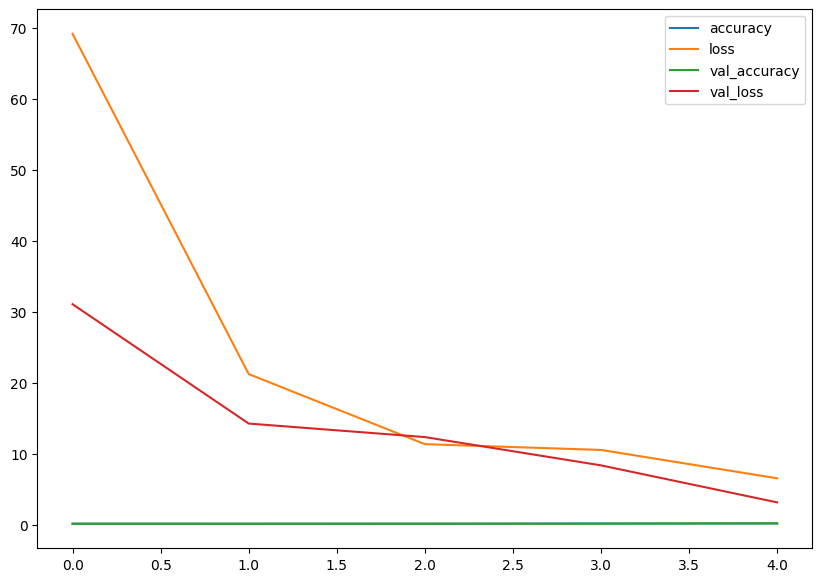

In [107]:
pd.DataFrame(history_2.history).plot(figsize=(10, 7));

In [108]:
history_3.history

{'accuracy': [0.20250000059604645,
  0.1899999976158142,
  0.20499999821186066,
  0.23250000178813934,
  0.2524999976158142],
 'loss': [1.6221235990524292,
  1.6118576526641846,
  1.6101243495941162,
  1.6077373027801514,
  1.604923963546753],
 'val_accuracy': [0.18000000715255737,
  0.1899999976158142,
  0.20000000298023224,
  0.1899999976158142,
  0.20000000298023224],
 'val_loss': [1.6130530834197998,
  1.6113765239715576,
  1.610606074333191,
  1.6087520122528076,
  1.608791470527649]}

In [109]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

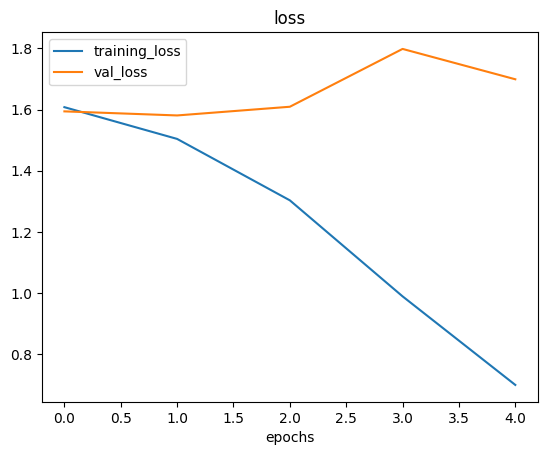

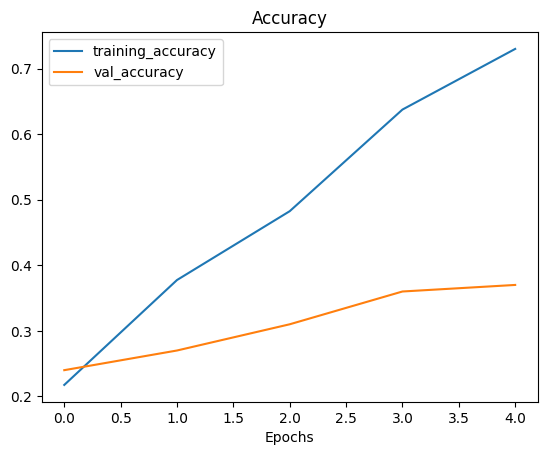

In [110]:
plot_loss_curves(history_1)

# Data Augmentation

In [111]:
# Augmented Dataset
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True,
                                          vertical_flip=True)

# Normal Dataset
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

In [112]:
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=dir,
                                                                   batch_size=32,
                                                                   target_size=(224,224),
                                                                   class_mode='categorical',
                                                                   subset='training',
                                                                   shuffle=False,
                                                                   seed=42)

train_data = train_datagen.flow_from_directory(directory=dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='categorical',
                                               shuffle=False,
                                               seed=42)

IMG_SIZE = (224,224)
test_data = test_datagen.flow_from_directory(directory=dir,
                                             batch_size=32,
                                             target_size=IMG_SIZE,
                                             class_mode='categorical',
                                             seed=42)

Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [113]:
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

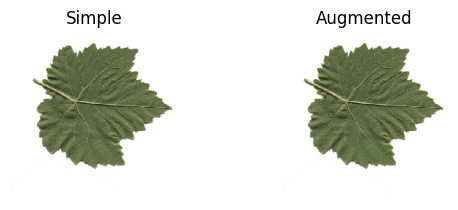

In [114]:
plt.figure()
random_number = np.random.randint(len(augmented_images))

plt.subplot(2,2,1)
plt.imshow(images[random_number])
plt.title('Simple')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(images[random_number])
plt.title('Augmented')
plt.axis('off')

In [115]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
optimizer=Adam(learning_rate=1e-3)
model_4.compile(loss='categorical_crossentropy',
               optimizer=optimizer,
               metrics=['accuracy'])

In [117]:
history_4 = model_4.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 731ms/step - accuracy: 0.3012 - loss: 3.6537 - val_accuracy: 0.2380 - val_loss: 1.6467
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 662ms/step - accuracy: 0.1363 - loss: 1.7793 - val_accuracy: 0.2000 - val_loss: 1.7831
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 821ms/step - accuracy: 0.3062 - loss: 1.5606 - val_accuracy: 0.2020 - val_loss: 1.6352
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 778ms/step - accuracy: 0.1591 - loss: 1.7203 - val_accuracy: 0.2180 - val_loss: 1.6017
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 776ms/step - accuracy: 0.1839 - loss: 1.6377 - val_accuracy: 0.2040 - val_loss: 1.5955


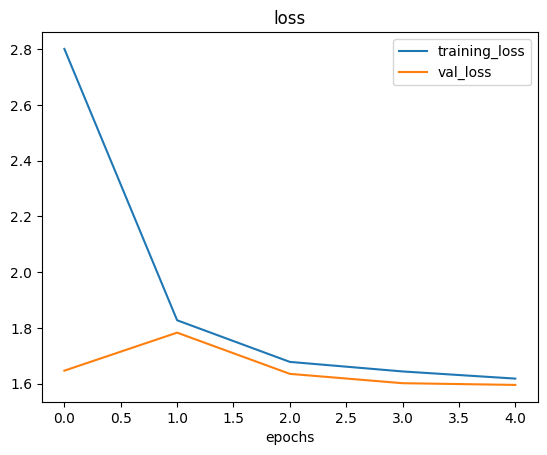

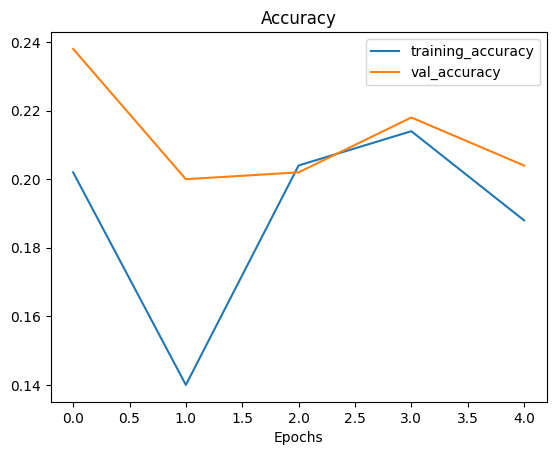

In [118]:
plot_loss_curves(history_4)

In [119]:
# Shuffle data
train_data_augmented_and_shuffled = train_datagen_augmented.flow_from_directory(directory=dir,
                                                                                batch_size=32,
                                                                                target_size=IMG_SIZE,
                                                                                class_mode='categorical',
                                                                                subset='training',
                                                                                shuffle=True)

Found 500 images belonging to 5 classes.


In [120]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                            kernel_size=(3, 3),
                            padding='valid',
                            kernel_initializer='he_normal',
                            activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           kernel_initializer='he_normal',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [121]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_5.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

# CheckPoint and EarlyStopping

In [131]:
ckp = tf.keras.callbacks.ModelCheckpoint('MyCheckpoint.weights.h5',
                                                   save_weights_only=True)
es = tf.keras.callbacks.EarlyStopping(restore_best_weights=True,
                                                     patience=1,
                                                     monitor='loss')

In [132]:
history_5 = model_5.fit(train_data_augmented_and_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_and_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks=[ckp,es])

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 800ms/step - accuracy: 0.2677 - loss: 1.5824 - val_accuracy: 0.2940 - val_loss: 1.5102
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 645ms/step - accuracy: 0.2550 - loss: 1.5765 - val_accuracy: 0.3420 - val_loss: 1.4969
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 714ms/step - accuracy: 0.2588 - loss: 1.5771 - val_accuracy: 0.3240 - val_loss: 1.4803
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 667ms/step - accuracy: 0.2852 - loss: 1.6013 - val_accuracy: 0.3700 - val_loss: 1.4953


In [135]:
augmented_images.shape

(32, 224, 224, 3)

In [136]:
tf.expand_dims(augmented_labels,axis=0)

<tf.Tensor: shape=(1, 32, 5), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0

# BatchNormalization

In [143]:
model_1_with_bn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           input_shape=(224, 224, 3),
                           strides=(2, 2),
                           activation='relu',
                           kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal',
                           strides=(2, 2)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal',
                           strides=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=(3, 3),
                           padding='valid',
                           activation='relu',
                           kernel_initializer='he_normal',
                           strides=(2, 2)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [144]:
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model_1_with_bn.compile(loss='categorical_crossentropy',
                            optimizer=optimizer,
                            metrics=['accuracy'])

In [145]:
history_1_with_bn = model_1_with_bn.fit(train_data,
                                        epochs=5,
                                        steps_per_epoch=len(train_data),
                                        validation_data=test_data,
                                        validation_steps=len(test_data))

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 609ms/step - accuracy: 0.1809 - loss: 4.3608 - val_accuracy: 0.2180 - val_loss: 1.6387
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.2142 - loss: 3.1519 - val_accuracy: 0.2200 - val_loss: 1.6263
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 325ms/step - accuracy: 0.2515 - loss: 2.7618 - val_accuracy: 0.2220 - val_loss: 1.6510
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 339ms/step - accuracy: 0.2414 - loss: 2.6416 - val_accuracy: 0.1880 - val_loss: 1.6918
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 350ms/step - accuracy: 0.2192 - loss: 2.6345 - val_accuracy: 0.1800 - val_loss: 1.7781


In [146]:
model_1_with_bn.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.1688 - loss: 1.7959


[1.7780520915985107, 0.18000000715255737]